## EDA with Python
We'll be trying to predict a classification - survival or deceased.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()
#sibsp -> SiblingSpouse
#Parch -> ParentChild

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

First step in EDA is to check for missing values.

In [4]:
train.isnull() ## Will tell whether each and every column in null or not
## If true, it means that value is null.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
## It is difficult to check which columns has null values. So better way is to represent it in visual format

<AxesSubplot: >

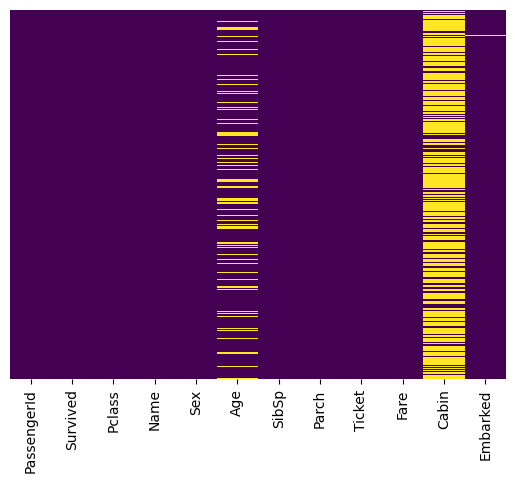

In [6]:
## train.isnull() is a condition if this condition returns true, it will be displyed on the heatmap
## yticklabels = false, tells not to plot values on the y axis
## cbar = false, tells not to draw the colorbar on the right side of the heatmap
## Because of this cmap, all the null values are in yellow color
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

Roughly 20% of the age data is missing. But in the cabin column we are missing way too much data, either we can drop the column or change it to other feature like isCabinDataPresent with values 0 or 1 

<AxesSubplot: xlabel='Survived', ylabel='count'>

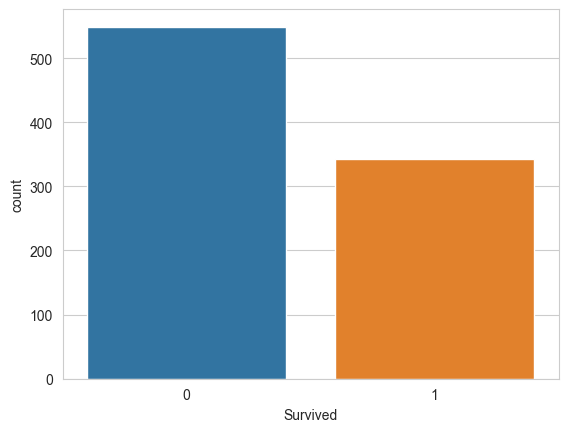

In [7]:
sns.set_style('whitegrid') ## The background of the plot is of type whitegrid, which makes easier to approximate values
## while reading the data visually.
sns.countplot(x = 'Survived', data = train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

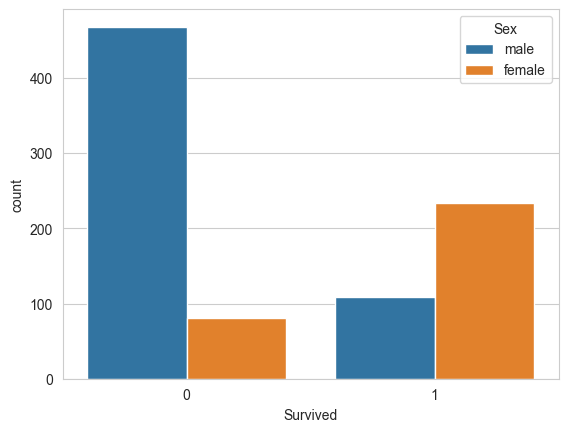

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

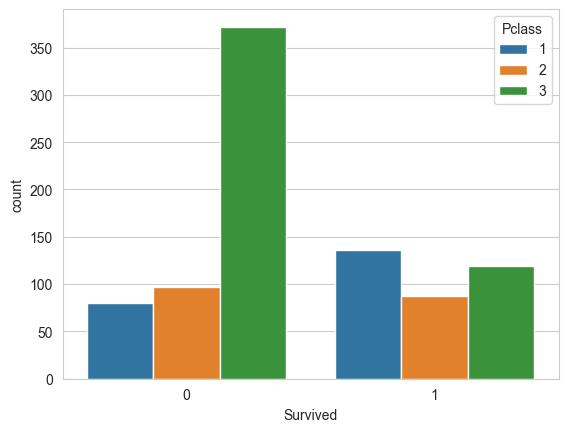

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

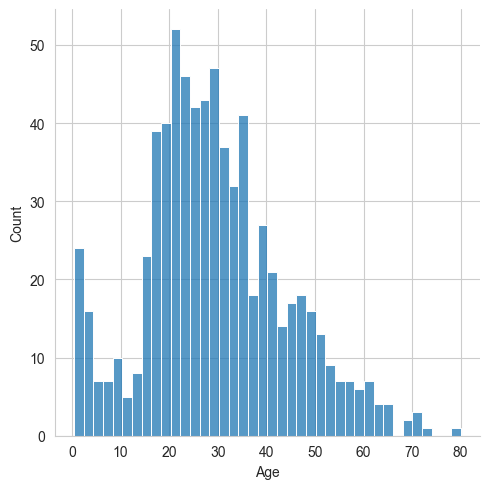

In [10]:
sns.displot(train['Age'].dropna(),kde=False,bins=40) 

<AxesSubplot: xlabel='SibSp', ylabel='count'>

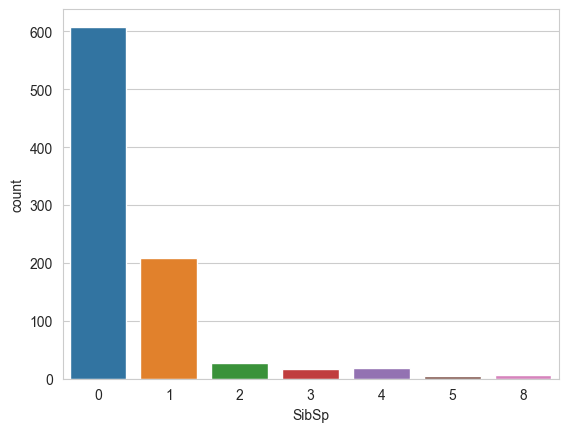

In [11]:
sns.countplot(x = 'SibSp',data = train)

## Data Cleaning

We want to fill the missing age data instead of removing the rows where age is null. We can check the average age in the passenger class and try to fill the missing values.

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

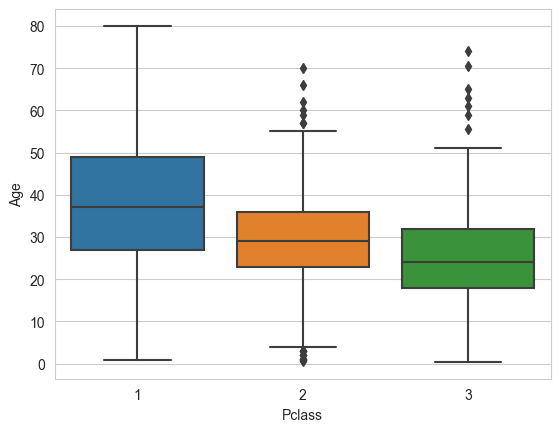

In [12]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [13]:
## From tha above boxplot, we can find out that the average age of the passengers in 1st, 2nd and 3rd classes
## are 37, 29 and 24 respectively

In [14]:
def fill_Age(cols):
    Age = cols[0]
    PClass = cols[1]
    
    if pd.isnull(Age):
        if PClass == 1:
            return 37
        elif PClass == 2:
            return 29
        elif PClass == 3:
            return 24
    else:
        return Age

In [15]:
## Axis along which the function is applied:

##    * 0 or 'index': apply function to each column.
##    * 1 or 'columns': apply function to each row.

train['Age'] = train[['Age','Pclass']].apply(fill_Age,axis=1)

After filling these age values check again using heatmap, if all values are filled

<AxesSubplot: >

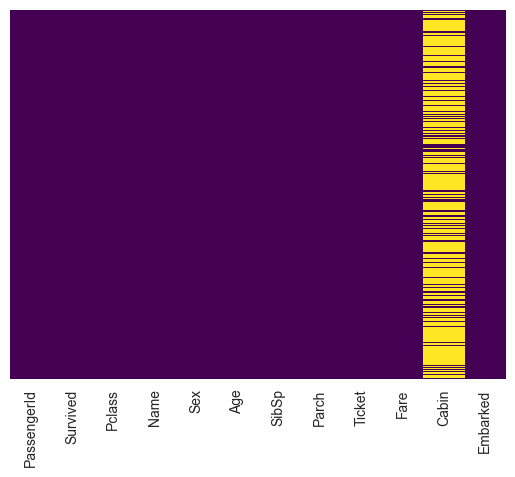

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's drop the Cabin column as there are lot of null values

In [17]:
train.drop('Cabin',axis=1,inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
## Embarked implies where the traveler mounted from (boarded the ship) either Southampton, Cherbourg, and Queenstown

In [21]:
pd.get_dummies(train['Embarked'],drop_first=True)
## The reason to drop_first column is that, the other two columns can give the value for it
## C Q S
## 0 0 1 -> Tells that embarked is from S
## 0 1 0 -> Tells that embarked is from Q
## 1 0 0 -> Tells that embarked is from C
## If you remove the first column then 
## Q S
## 0 0 -> Tells that embarked is from C

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [25]:
train = pd.concat([train,sex,embark],axis = 1)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Our data is ready for applying ML Model`

## Train Test Split

In [27]:
#train.drop('Survived',axis = 1,inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
!pip install Scikit-learn

In [30]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.3
                                                 ,random_state=101)

## Training and Predicting

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logisticRegressionModel = LogisticRegression()
logisticRegressionModel.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predictions = logisticRegressionModel.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
accuracy = confusion_matrix(y_test,predictions)

In [43]:
accuracy

array([[136,  18],
       [ 43,  71]])

In [45]:
accuracy_score_of_the_model = accuracy_score(y_test,predictions)
accuracy_score_of_the_model

0.7723880597014925